# **Sentiment Analysis using Neural Networks**

### **Description**

Sentiment analysis is a wellknown application of Natural Language Processing.It helps us identify the tone in the sentence- positive, negative or neutral. Sentiment analysis has various use cases. One such use case could be to identify sentiment in the support tickets which can help to assign priority for resolution. Machine Learning and NLP models can be used to train on a large dataset to predict the sentiment of the sentence. In this notebook the model is trained on the IMDB reviews dataset provided by tensorflow.

### **Importing the dataset**



1.   Load the data from tensorflow datasets
2.   Split the data into sentences and labels

 Here labels are values to be predicted




In [11]:
import tensorflow as tf
import tensorflow_datasets as tfds
imdb,info = tfds.load("imdb_reviews",with_info = True,as_supervised=True)

import numpy as np
train_data,test_data = imdb['train'],imdb['test']
training_sentences =[]
training_labels=[]

testing_sentences=[]
testing_labels=[]

for s,l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())

for s,l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

### **Creating a vocabulary**

The next step is to create a vocabulary of words that can be used to train. Each word is assigned a value, this process is called Tokenization. Since the neural network models are designed for values, we need to convert text to a number. If a new word which is not present in vocabulary is encountered then, the tokenizer assigns <OOV> to the word.




In [12]:
vocab_size=10000
embedding_dim=16
max_length=20

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size,oov_token='<OOV>')
tokenizer.fit_on_texts(training_sentences)
word_index=tokenizer.word_index

training_sequence =tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(training_sequence,truncating='post',maxlen=max_length)

testing_sequence =tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequence,truncating='post',maxlen=max_length)


### **Training the model**

Here a simple sequential model with Embedding layer is used to train on the training sequences(text converted to a sequence of numbers). 

In [14]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(6,activation='relu'),
                                    tf.keras.layers.Dense(1,activation='sigmoid')

])
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(padded, training_labels_final, epochs=10,validation_data=(testing_padded,testing_labels_final))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 20, 16)            160000    
                                                                 
 flatten_2 (Flatten)         (None, 320)               0         
                                                                 
 dense_6 (Dense)             (None, 6)                 1926      
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 161,933
Trainable params: 161,933
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
782/782 [==============================] - 4s 4ms/step - loss: 0.6337 - accuracy: 0.6263 - val_loss: 0.5629 - val_accuracy: 0.7007
Epoch 2/10
782/782 [==================

### **Plotting Training accuracy vs Validation Accuracy**

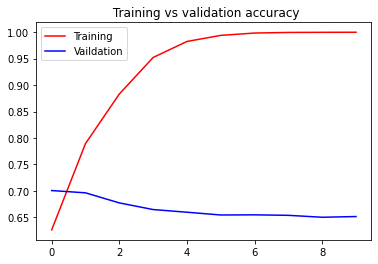

In [17]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(acc,'r',label="Training")
plt.plot(val_acc,'b',label='Vaildation')
plt.legend()
plt.title(" Training vs validation accuracy")
plt.show()
